In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import statistics
import sys
from collections import Counter


In [26]:
orders = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
orders.head()


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [29]:
#  we naively calculate an AOV of $3145.13, this incorrect calculation.
order_amount_sum = orders['order_amount'].sum()
totat_items_count = orders['total_items'].count()
incorrect_AOV = order_amount_sum/totat_items_count
print('The incorrect calculated AOV is: ', incorrect_AOV)

The incorrect calculated AOV is:  3145.128


In [30]:
# or naive calculation can also be obtained by this (mean from the table), both imply the same thing 
pd.Series(orders['order_amount']).describe()


count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Question 1a: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

**=> This calculation tries to evaluate the AOV across all 100 shops over the 30 day window by averaging the order_amount column, i.e dividing order_amount by count of total_items (and not sum). The result is a very high value.**

[According to this blog on Shopify's Website](https://www.shopify.com.ng/blog/average-order-value#averageorder) If a shop has a sale of $2000 and has a 100 orders, Average order value is $20. 

An order can have multiple quantities (and products but since it is assumed shops only sell one model of shoe). To get AOV we divide the total revenue by the total number of orders. Doing this for each shop and getting the average.

### Summary
One way of approaching could be to first find the AOV i.e (total order amount / no of orders) of each shop and then find the Mean, Median, Mode of AOV of all the 100 shops.

In [38]:
'''iterating over all shops and storing average order value, 
 quantity of sneakers sold, average price of sneaker by each shop''' 
aov_all_shops=[]
qty_all_shops=[]
avg_price_of_sneaker_all_shops=[]
for i in range(1, max(orders['shop_id']) + 1):
    no_of_orders = orders[orders['shop_id'] == i]['order_id'].count()
    order_amount = orders[orders['shop_id'] == i]['order_amount'].sum()
    totat_items_sum = orders[orders['shop_id'] == i]['total_items'].sum()
    average_price_of_sneaker = order_amount/totat_items_sum
    aov =  order_amount/no_of_orders
    aov_all_shops.append(aov)
    qty_all_shops.append(totat_items_sum)
    avg_price_of_sneaker_all_shops.append(average_price_of_sneaker)

print('mean of Average order value', statistics.mean(aov_all_shops))
print('median of Average order value is: ', statistics.median(aov_all_shops))



mean of Average order value 3136.834087887025
median of Average order value is:  308.8897584973166


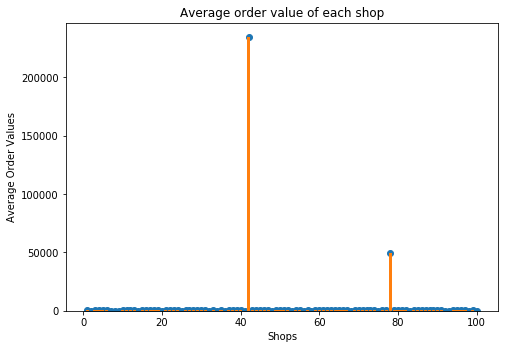

In [32]:
# plot showing avg order value of each shop 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

x = [i for i in range(1,101)]
y = aov_all_shops
plt.scatter(x, y)
plt.title('Average order value of each shop')
plt.xlabel('Shops')
plt.ylabel('Average Order Values')
ax.bar(x, y)
plt.show()

Plot doesn't convey much other than the fact that there are a couple of outiers, that could be investigated. 


### Average Price of a pair of sneaker 


In [20]:
print('Summary of Average Price of a Sneaker \n', pd.Series(avg_price_of_sneaker_all_shops).describe())
c_avg_price_of_sneaker_all_shops = Counter(avg_price_of_sneaker_all_shops)
print('mode of Average price of sneaker in each shop is: ', c_avg_price_of_sneaker_all_shops.most_common(1)[0][0])


Summary of Average Price of a Sneaker 
 count      100.000000
mean       407.990000
std       2557.462906
min         90.000000
25%        132.750000
50%        153.000000
75%        168.250000
max      25725.000000
dtype: float64
mode of Average price of sneaker in each shop is:  153.0


The mean price of a pair of sneaker across all shops is 407.99 Dollars, the median price is 153 Dollars and the mode price is also 153 Dollars. The maximum price of same pair of shoes is 25,725 Dollars, as seen in shop 78. Since this is way above the 3rd quantile, it means it is an outlier. Thus it affects the value of Mean. Here, <b><i>Median and Mode</i> </b> are  more <b>robust</b> as they help dampen the effect of outliers. 

### Quantity sold by each shop


In [35]:
print('Summary of Quantity Sold by each shop \n', pd.Series(qty_all_shops).describe())
c_qty_of_sneaker_sold_all_shops = Counter(avg_price_of_sneaker_all_shops)
print('mode of quantity sold: ', c_qty_of_sneaker_sold_all_shops.most_common(1)[0][0])


Summary of Quantity Sold by each shop 
 count      100.000000
mean       439.360000
std       3396.366111
min         67.000000
25%         88.000000
50%        100.000000
75%        111.250000
max      34063.000000
dtype: float64
mode of quantity sold:  153.0


Quantity sold is another important metric in determining stores performance, It can be seen that a shop(shop_id=42) sells 34,063 pairs of shoes, it is an outlier. To dampen the effect of outlier median seems to be a better metric than mean. The median is 100 pairs and the mode is 153 pairs. So most of the stores sell 153 pair of shoes in a month  

### Average Order Value

In [34]:
print('Summary of Average order value of each shop \n', pd.Series(aov_all_shops).describe())
c_aov_allshops = Counter(aov_all_shops)
print('mode of Average order value is: ', c_aov_allshops.most_common(1)[0][0])


Summary of Average order value of each shop 
 count       100.000000
mean       3136.834088
std       23935.881130
min         162.857143
25%         263.675962
50%         308.889758
75%         336.628352
max      235101.490196
dtype: float64
mode of Average order value is:  308.8181818181818


Shop with shop_id 78 really affects the mean, because it sells a pair of shoes at a very high price of $25,725 which is way higher than the 3rd quantile i.e it is an outlier. Removing the outlier could give better results but since we don't have sufficient data which supports the argument that the price is wrong. Removing shop_id 78 would not be right. So I don't remove it from our analysis. 
The median of Average order value of each shop is 308.89 whereas the mode is 308.81


Question 1b: What metric would you report for this dataset?

As written in shopify's blog
" Average order value will only give you a partial picture of your customer's purchase behavior. If you want to increase the value of your orders, he recommends business owners to consider all three measures of central tendency
1) Mean
2) Median
3) Mode

"

I would report modal order value (order value, shoes price) and median order value for this data set because due to outliers means value gets affected. Whereas median and mode shows a better picture of sales because they reduce the effect of outliers. As said in the blog, The shop owner should aim to move the modal orders up. 

Question 1c: What is its value?
Median and Mode of Average order value is 308.89 and 308.81 Dollars respectively.
Median and Mode of Average price of snear is 153 and 153 Dollars respectively.


### Interesting Observations

Shop with Shop_id 78 sells 88 shoes at a staggering price of 25,725 Dollars (God know what marketing they do), where as shop with Shop_id 42 sells 34063 pair of shoes at a price of $352. On playing around with data, I saw user_id 607 has multiple large transactions, buying 2000 sneaker pairs multiple times (17 to be exact) at same time. It could be some one using a bot to buy sneakaers for purpose of reselling or it could be an error.

Fun Point: This analysis can be helpful for one who wants to open a sneaker store. One could get to know about the quantity 

